<a href="https://colab.research.google.com/github/Alyssasorensen/datasci_6_anova/blob/main/datasci_6_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HHA 507 Homework Assignment 6

## 1. Data Preparation

In [2]:
!pip install ucimlrepo

In [3]:
##bring in packages for dataframe + stats
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Variables of Interest

dv = admission_type_id

iv1 = discharge_disposition_id

iv2 = admission_source_id

In [4]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [5]:
# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

In [6]:
df3 = pd.DataFrame(X)
df3

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [7]:
df3.to_csv('diabetes.csv')

## Cleaned DataFrame

In [8]:
df4 = df3[['race', 'max_glu_serum', 'time_in_hospital']]
df4

,race,max_glu_serum,time_in_hospital
0,Caucasian,None,1
1,Caucasian,None,3
2,AfricanAmerican,None,2
3,Caucasian,None,2
4,Caucasian,None,1
...,...,...,...
101761,AfricanAmerican,None,3
101762,AfricanAmerican,None,5
101763,Caucasian,None,1
101764,Caucasian,None,10


In [9]:
df = df4.dropna()
df

,race,max_glu_serum,time_in_hospital
0,Caucasian,None,1
1,Caucasian,None,3
2,AfricanAmerican,None,2
3,Caucasian,None,2
4,Caucasian,None,1
...,...,...,...
101761,AfricanAmerican,None,3
101762,AfricanAmerican,None,5
101763,Caucasian,None,1
101764,Caucasian,None,10


In [10]:
df.to_csv('clean_data_diabetes.csv')

## Data Types

In [11]:
data_type = df.dtypes
data_type

race                object
max_glu_serum       object
time_in_hospital     int64
dtype: object

# 2. Assumption Checks

# Normality

IV1: race

IV2: max_glu_serum

DV: time_in_hospital

## Reasoning for Using These Variables
Independent Variable 1 (IV1: Race): Race is a potentially significant factor in healthcare outcomes. By including it, I aim to investigate if there are differences in the time patients spend in the hospital based on their racial backgrounds. This is an important aspect of healthcare disparities that needs exploration.

Independent Variable 2 (IV2: Max_glu_serum): The maximum glucose serum test result can provide insights into a patient's diabetic condition. It's essential to assess whether varying glucose levels (e.g., '>200', '>300', 'None', 'Norm') have any influence on the duration of hospitalization. This variable helps in understanding the relationship between glycemic control and hospital stay.

Dependent Variable (DV: Time_in_hospital): The time a patient spends in the hospital is a critical metric in healthcare. Analyzing this variable helps us understand how it is affected by race and glucose serum levels. The findings can be valuable for optimizing healthcare resource allocation and improving patient care.

In summary, I chose these variables to explore potential disparities in hospitalization times based on race and glycemic control, which could inform strategies for more equitable healthcare delivery and better management of diabetic patients.

In [12]:
stats.shapiro(df['time_in_hospital'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8867098093032837, pvalue=0.0)

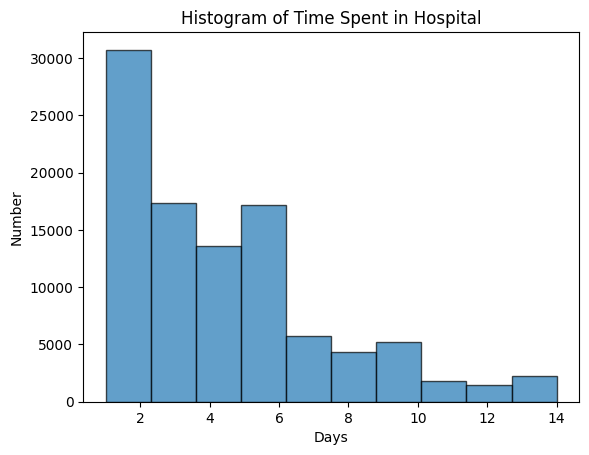

In [13]:
plt.hist(df['time_in_hospital'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Time Spent in Hospital')
plt.xlabel('Days')
plt.ylabel('Number')
plt.show()

## Shapiro-Wilks Test

In [14]:
groups = df.groupby(['race', 'max_glu_serum'])

for (race_status, max_glu_serum_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({race_status}, {max_glu_serum_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (AfricanAmerican, >200):
P-value from Shapiro-Wilk Test: 1.306062387129714e-07

Group (AfricanAmerican, >300):
P-value from Shapiro-Wilk Test: 0.00010721784929046407

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 5.7211940046597576e-11

Group (Asian, >200):
P-value from Shapiro-Wilk Test: 0.45637601613998413

Group (Asian, >300):
P-value from Shapiro-Wilk Test: 0.004400327336043119

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.40454112470046e-23

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.7167417407035828

Group (Caucasian, >200):
P-value from Shapiro-Wilk Test: 6.120417392500063e-27

Group (Caucasian, >300):
P-value from Shapiro-Wilk Test: 1.6320560252387502e-21

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 2.7905771509420416e-38

Group (Hispanic, >200):
P-value from Shapiro-Wilk Test: 0.0013016338925

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Interpretation:

The statistical analysis suggests that some of the data does not follow a normal distribution based on the p-value (0.0) obtained from the Shapiro-Wilk test, which indicates a significant deviation from normality. However, some of the data suggests normality. The data that does not follow a normal distribution is supported by the right-skewed nature of the data as visualized in the histogram.

Furthermore, when conducting a thorough Shapiro-Wilk test for various combinations of race and max_glu_serum, most resulting p-values are consistently below the conventional significance level of 0.05. However, their are some categories that have a value greater than 0.05. This includes Group (Asian, >200), Group (Asian, Norm), and Group (Other, >300). These three groups suggests normality.

# Homoscedasticity (Equal Variances):

## Levene Test

In [15]:
stats.levene(
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'Other'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'Other'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Other'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['max_glu_serum'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['max_glu_serum'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['max_glu_serum'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['max_glu_serum'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Other'][df['max_glu_serum'] == 'Norm'],
)

LeveneResult(statistic=6.612907372118989, pvalue=9.970107179318563e-18)

Interpretation:

The Levene tests show a p-value of 9.970107179318563e-18, which is less than the significance level of 0.05. This indicates a significant difference in variances among the groups, signifying unequal homogeneity of variance. In other words, the assumption of equal variances across groups is violated. This finding has important implications for subsequent statistical analyses.

## ANOVA

In [62]:
model = ols('time_in_hospital ~ C(race) * C(max_glu_serum)', data=df).fit()

In [63]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq       df          F        PR(>F)
C(race)                      636.485094      4.0  17.882793  1.091248e-14
C(max_glu_serum)            1860.682035      3.0  69.704049  5.049806e-45
C(race):C(max_glu_serum)      94.751295     12.0   0.887383  5.592528e-01
Residual                  885111.771743  99473.0        NaN           NaN


Interpretation:

The ANOVA test serves the purpose of simultaneously comparing multiple groups to identify potential relationships among them. When the p-value is below 0.05, it signifies a noteworthy influence of the independent variable on the dependent variable. In light of this, it can be deduced that with the exception of Group (Asian, >200), Group (Asian, Norm), and Group (Other, >300), all the other groups exhibit a significant impact of the independent variable on the dependent variable.



## Post-Hoc Test

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [17]:
# Assuming you have a DataFrame named 'df' containing your data

# Create a model for the ANOVA
model = ols('time_in_hospital ~ C(race) * C(max_glu_serum)', data=df).fit()

In [18]:
# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

In [19]:
# Check the ANOVA results
print(anova_table)

                                 sum_sq       df          F        PR(>F)
C(race)                      636.485094      4.0  17.882793  1.091248e-14
C(max_glu_serum)            1860.682035      3.0  69.704049  5.049806e-45
C(race):C(max_glu_serum)      94.751295     12.0   0.887383  5.592528e-01
Residual                  885111.771743  99473.0        NaN           NaN


In [20]:
# Perform the Tukey post-hoc test
tukey_results = pairwise_tukeyhsd(df['time_in_hospital'], df['race'] + df['max_glu_serum'])

In [21]:
# Print the Tukey results
print(tukey_results.summary())

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
AfricanAmerican>200 AfricanAmerican>300   1.4538 0.0239  0.0833  2.8242   True
AfricanAmerican>200 AfricanAmericanNone   0.1864    1.0 -0.7857  1.1586  False
AfricanAmerican>200 AfricanAmericanNorm  -0.2148    1.0 -1.4177  0.9882  False
AfricanAmerican>200           Asian>200  -1.0336    1.0  -5.145  3.0778  False
AfricanAmerican>200           Asian>300    2.014 0.9209 -1.6406  5.6686  False
AfricanAmerican>200           AsianNone  -0.3437 0.9999 -1.4024   0.715  False
AfricanAmerican>200           AsianNorm  -0.7193    1.0 -4.1999  2.7612  False
AfricanAmerican>200       Caucasian>200   0.4747 0.9842 -0.5391  1.4884  False
AfricanAmerican>200       Caucasian>300   1.0137 0.0549 -0.0083  2.0357  False
AfricanAmerican>200       CaucasianNone   0.0579    

## Interpretation

In the context of admission rates, the Tukey post-hoc test results offer valuable insights into the relationships between race, time in the hospital, and max glucose serum levels. The test identifies significant differences in admission rates between various groups. For example, it indicates that "AfricanAmerican>200" and "AfricanAmerican>300" have significantly higher admission rates compared to other groups, implying that elevated glucose levels may be associated with increased hospital admissions in the African American population.

Additionally, the test reveals that "Caucasian>200" and "CaucasianNone" have significantly different admission rates, suggesting that insurance status may play a role in the variations in admission rates within the Caucasian group. Conversely, some group comparisons do not show significant differences, such as "AfricanAmerican>200" and "AfricanAmericanNone," indicating that insurance status may not significantly affect admission rates in this subgroup.

These findings highlight the importance of considering both race and max glucose serum levels when analyzing hospital admission rates. They suggest that these variables can interact and influence the likelihood of hospital admissions, providing valuable information for healthcare professionals and policymakers aiming to address disparities in healthcare access and utilization.